In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import itertools

In [2]:
cases= pd.read_csv("C:/Users/Checkout/Downloads/coviddata/covid_19_clean_complete.csv")


In [3]:
cases

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


<AxesSubplot:>

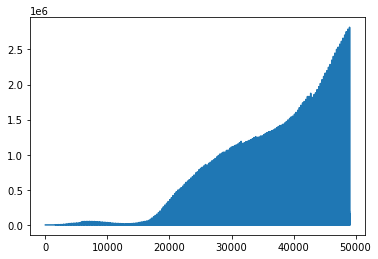

In [3]:
cases['Active'].plot()

In [4]:
cases.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [5]:
cases.shape

(49068, 10)

In [6]:
cases['Date']=pd.to_datetime(cases['Date'])
vaccin

In [7]:
active = cases[['Date','Country/Region','Active']]

In [8]:
active

,Date,Country/Region,Active
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0
...,...,...,...
49063,2020-07-27,Sao Tome and Principe,117
49064,2020-07-27,Yemen,375
49065,2020-07-27,Comoros,19
49066,2020-07-27,Tajikistan,1147


In [9]:
total_active=cases.groupby(["Country/Region","Date"])['Active'].sum().reset_index()

In [10]:
total_active.head()

,Country/Region,Date,Active
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [11]:
rtoll = total_active.copy()

In [12]:
rtoll.head()

,Country/Region,Date,Active
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [13]:
rtoll.set_index('Date',inplace=True)

In [14]:
rtoll.index = pd.to_datetime(rtoll.index)

In [15]:
rtoll.head()

,Country/Region,Active
Date,,
2020-01-22,Afghanistan,0
2020-01-23,Afghanistan,0
2020-01-24,Afghanistan,0
2020-01-25,Afghanistan,0
2020-01-26,Afghanistan,0


<AxesSubplot:xlabel='Date'>

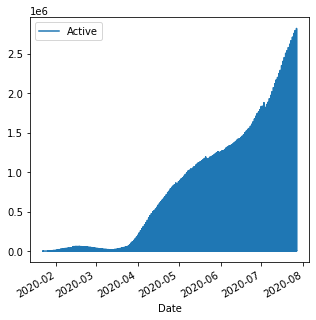

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] =5,5
rtoll.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_results = adfuller(rtoll['Active'])

In [19]:
def adfuller_test (deaths):
    result = adfuller(deaths)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+ str(value))
    if(result[1]<=0.05):
        print("Stationary")
    else:
        print("Not Stationary")

In [20]:
adfuller_test(rtoll['Active'])

ADF Test Statistic:-16.651928264461535
p-value:1.6012826481123947e-29
#Lags Used:1
Number of Observations Used:35154
Stationary


In [21]:
rtoll.isnull().sum()

Country/Region    0
Active            0
dtype: int64

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

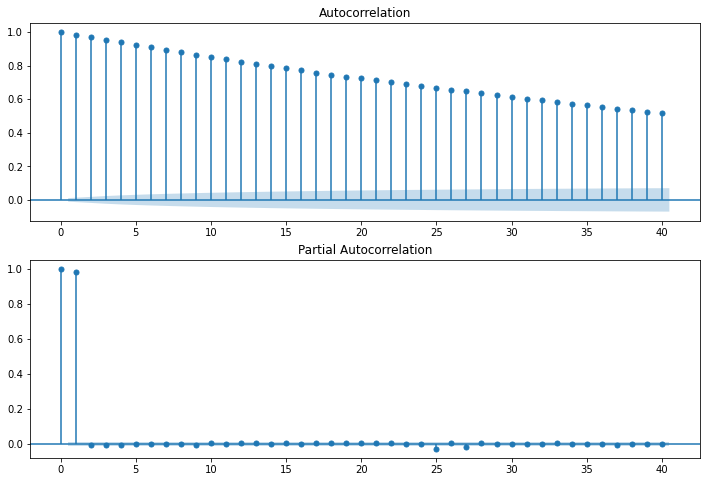

In [23]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(rtoll['Active'].iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(rtoll['Active'].iloc[1:],lags=40,ax=ax2)

In [24]:
from statsmodels.tsa.arima_model import ARIMA


In [192]:
selected_country="Albania"
country_df = rtoll[rtoll['Country/Region']==selected_country]
print(country_df)

           Country/Region  Active
Date                             
2020-01-22        Albania       0
2020-01-23        Albania       0
2020-01-24        Albania       0
2020-01-25        Albania       0
2020-01-26        Albania       0
...                   ...     ...
2020-07-23        Albania    1820
2020-07-24        Albania    1834
2020-07-25        Albania    1866
2020-07-26        Albania    1943
2020-07-27        Albania    1991

[188 rows x 2 columns]


In [128]:

country_df.index = pd.to_datetime(country_df.index)


In [129]:
p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [174]:
for param in pdq:
        try:
            model=ARIMA(country_df['Active'].dropna(),order=param)
            results=model.fit()
            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue

ARIMA(0, 0, 0)- AIC:4942.7248424817135
ARIMA(0, 0, 1)- AIC:4695.592727276466
ARIMA(0, 1, 0)- AIC:3627.2752252888026
ARIMA(0, 1, 1)- AIC:3519.9307222236307
ARIMA(1, 0, 0)- AIC:3728.2362567461487
ARIMA(1, 1, 0)- AIC:3378.586040052179


In [175]:
model = ARIMA(country_df['Active'].dropna(),order=(0,1,1))

In [176]:
results=model.fit()

In [177]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,2644.1548,343.433,7.699,0.000,1971.039,3317.270
ma.L1.D.Active,0.6181,0.050,12.366,0.000,0.520,0.716


In [178]:
results

In [179]:
country_df['Forecast']=results.predict(start=pd.to_datetime('2020-01-24'),dynamic=True)

In [180]:
country_df['Forecast'].tail(5)

Date
2020-07-23    2644.154827
2020-07-24    2644.154827
2020-07-25    2644.154827
2020-07-26    2644.154827
2020-07-27    2644.154827
Name: Forecast, dtype: float64

In [181]:
country_df.index[-1]

Timestamp('2020-07-27 00:00:00')

In [182]:
from datetime import date
f_date = pd.to_datetime('2020-07-27')
end='2021-05-12'
l_date=pd.to_datetime(end)
delta = l_date - f_date
print(delta.days)
days=delta.days


289


In [183]:
forecast = results.forecast(steps=days)[0]

In [184]:
forecast

array([ 497938.77275732,  500582.92758383,  503227.08241035,
        505871.23723686,  508515.39206337,  511159.54688988,
        513803.7017164 ,  516447.85654291,  519092.01136942,
        521736.16619593,  524380.32102245,  527024.47584896,
        529668.63067547,  532312.78550198,  534956.9403285 ,
        537601.09515501,  540245.24998152,  542889.40480804,
        545533.55963455,  548177.71446106,  550821.86928757,
        553466.02411409,  556110.1789406 ,  558754.33376711,
        561398.48859362,  564042.64342014,  566686.79824665,
        569330.95307316,  571975.10789968,  574619.26272619,
        577263.4175527 ,  579907.57237921,  582551.72720573,
        585195.88203224,  587840.03685875,  590484.19168526,
        593128.34651178,  595772.50133829,  598416.6561648 ,
        601060.81099131,  603704.96581783,  606349.12064434,
        608993.27547085,  611637.43029737,  614281.58512388,
        616925.73995039,  619569.8947769 ,  622214.04960342,
        624858.20442993,

In [185]:
from pandas.tseries.offsets import DateOffset
future_dates = [country_df.index[-1]+ DateOffset(days=x)for x in range(0,days)]

In [186]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=country_df.columns)

In [187]:
future_df = pd.concat([country_df,future_dates_df])

In [188]:
future_df.tail(6)


,Country/Region,Active,Forecast
2021-05-06,NaN,NaN,NaN
2021-05-07,NaN,NaN,NaN
2021-05-08,NaN,NaN,NaN
2021-05-09,NaN,NaN,NaN
2021-05-10,NaN,NaN,NaN
2021-05-11,NaN,NaN,NaN


In [170]:
future_df['Forecast'] = results.predict(start=f_date,end=l_date,dynamic=False)
future_df

,Country/Region,Active,Forecast
2020-01-22,China,503,NaN
2020-01-23,China,595,NaN
2020-01-24,China,858,NaN
2020-01-25,China,1325,NaN
2020-01-26,China,1970,NaN
...,...,...,...
2021-05-07,NaN,NaN,14.732618
2021-05-08,NaN,NaN,14.732618
2021-05-09,NaN,NaN,14.732618
2021-05-10,NaN,NaN,14.732618


In [4]:
# future_df[['Active','Forecast']].plot